In [1]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

## Model Selection: SARIMA

SARIMA, or Seasonal Autoregressive Integrated Moving Average, is an extension of the ARIMA model that specifically includes components for seasonality. The justification for selecting SARIMA for the half-hourly energy demand time series in Victoria, Australia, is as follows:

### Data Characteristics
- **Stationarity**: The Augmented Dickey-Fuller (ADF) test confirmed that the time series is stationary, which is a prerequisite for ARIMA-based models.
- **Seasonality**: The time series decomposition and Fourier analysis revealed clear seasonal patterns, which SARIMA can model with its seasonal parameters.

### Model Capabilities
- **Flexibility**: SARIMA's flexibility allows it to model a broad class of seasonal time series.
- **Seasonal Parameters**: It includes seasonal autoregressive (P), differencing (D), and moving average (Q) parameters along with a period (s) parameter to explicitly model the seasonality observed in the data.
- **Interpretability**: SARIMA models provide interpretable parameters that correspond to the data's autocorrelations and partial autocorrelations, making them favorable for understanding the driving forces behind the time series.

### Predictive Performance
- **Accuracy**: SARIMA models are known for their accuracy in forecasting time series data with seasonal patterns.
- **Adaptability**: They can be tuned to adapt to changes in the time series' structure over time, accommodating evolving trends and seasonal effects.

Given these points, SARIMA is a well-suited model for forecasting the energy demand time series and will be the primary focus in the next phase of our analysis.


In [2]:
vic_data = pd.read_csv("vic_data.csv")

In [3]:

# Make sure vic_data is loaded correctly and there are no missing values
vic_data.dropna(inplace=True)

# Define the model orders including adjustments based on diagnostics
order = (1, 1, 2)  # Increase the MA component to 2
seasonal_order = (1, 1, 2, 48)  # Increase the seasonal MA component to 2

# Initialize and fit the adjusted model
sarima_model = SARIMAX(vic_data['demand'], order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit(maxiter=50, method='lbfgs', disp=True, options={'eps': 0.01})


# Print the summary of the adjusted model
print(sarima_result.summary())

# Forecasting
n_periods = 48
forecast = sarima_result.get_forecast(steps=n_periods)
forecast_df = forecast.conf_int()
forecast_df['Forecast'] = forecast.predicted_mean

# Plot the forecast alongside the data
plt.figure(figsize=(10, 5))
plt.plot(vic_data['demand'].iloc[-n_periods * 5:], label='Energy Demand')  # Plot a subset for clarity
plt.plot(forecast_df['Forecast'], label='Forecast')
plt.fill_between(forecast_df.index,
                 forecast_df.iloc[:, 0],
                 forecast_df.iloc[:, 1], color='k', alpha=0.2)
plt.legend()
plt.show()

/Users/ayushpatel/Library/Python/3.9/lib/python/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: options. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.41534D+00    |proj g|=  6.76311D-02

At iterate    1    f=  5.40926D+00    |proj g|=  1.38674D-02

At iterate    2    f=  5.40900D+00    |proj g|=  5.47124D-03

At iterate    3    f=  5.40881D+00    |proj g|=  5.25611D-03

At iterate    4    f=  5.40867D+00    |proj g|=  7.51469D-03

At iterate    5    f=  5.40855D+00    |proj g|=  5.24120D-03

At iterate    6    f=  5.40843D+00    |proj g|=  5.51322D-03

At iterate    7    f=  5.40782D+00    |proj g|=  1.26659D-02

At iterate    8    f=  5.40698D+00    |proj g|=  1.73767D-02

At iterate    9    f=  5.40509D+00    |proj g|=  2.03179D-02

At iterate   10    f=  5.40093D+00    |proj g|=  2.59304D-02

At iterate   11    f=  5.39296D+00    |proj g|=  3.70394D-02

At iterate   12    f=  5.38993D+00    |proj g|=  3.56290D-02

At iterate   13    f=  5.3

: 

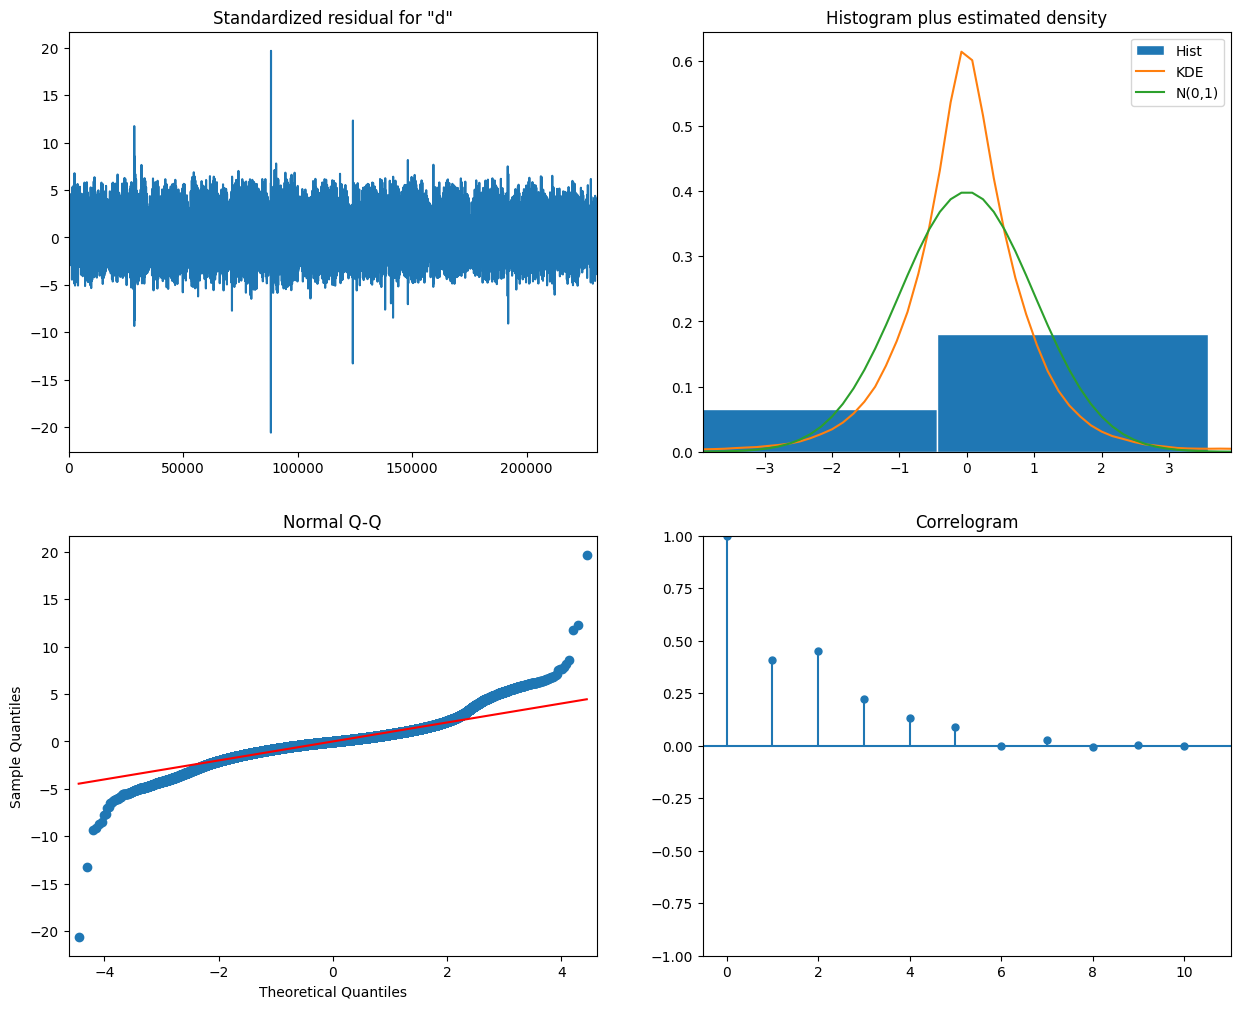

In [ ]:
sarima_result.plot_diagnostics(figsize=(15, 12))
plt.show()